### MY470 Computer Programming
# ⚡️ Algorithms and Order of Growth
### Week 9 Lecture

## Overview

* Algorithms and computational complexity
* Time complexity
    * Big-O notation
    * Important computational complexity classes
    * Performance of common Python data structures and methods
* Space complexity

## From Week 1: What Is an Algorithm?

A well-defined computational procedure that takes value(s) as input and produces value(s) as output

  * "Recipe" or "instructions" for solving a well-defined computational problem
  * Consists of a sequence of simple steps, control flow, and a stopping rule
  * Can be specified in human language or programming language

## Algorithm Analysis

Helps compare algorithms based on the amount of **computing resources** they use

  * Time (execution or **running time**)
  * Space (**memory**)


## Time Complexity: Example 1

How long does this program take to run?

In [5]:
def sum_of_n(n):
    """Assume n is a positive integer. 
    Calculate the sum of all integers from 1 to n, inclusive.
    """
    res = 0
    for i in range(1, n + 1):
        res += i
    return res

## Benchmarking

In [6]:
import time

start = time.time() # records start time
res = sum_of_n(1000000) # sums all integers from 1 to 1,000,000
end = time.time() # records end time
print(res, end - start)

500000500000 0.07599496841430664


## Limitations to Benchmarking 

Running time depends on:

  * The speed of the computer
  * The programming language
  * The compiler/programming language implementation
  * The value of the input

In [4]:
for i in [100000, 1000000, 10000000]:
    start = time.time()
    res = sum_of_n(i)
    end = time.time()
    print(res, end - start)

5000050000 0.006281852722167969
500000500000 0.05945992469787598
50000005000000 0.5503628253936768


## Measure Algorithm Efficiency Inpendently of Computer and Program

* Count **number of steps**, or basic operations (not seconds)
* Express measure as **function of the size of inputs**
* Consider the **upper bound** on the running time (the worst-case scenario) 
* Use an **approximation** as the size of the input gets extremely large

## Time Complexity: Example 1

In [7]:
def sum_of_n(n):
    """Assume n is a positive integer. 
    Calculate the sum of all integers from 1 to n, inclusive.
    """
    res = 0
    for i in range(1, n + 1):
        res += i
    return res

* The basic operation is assignment
* The number of steps is $T(n) = 1 + n$
* This is on the order of n: $O(n)$

## Big-O Notation

* The mathematical way to express running time
* Gives an **upper bound** on the asymptotic growth (also called **order of growth**) of an algorithm

   >The complexity of `func(n)` is $O(n^2)$

   * This means that in the worst case `func` will take on the order of $n^2$ steps to run.

## Important Computational Complexity Classes

| Big-O notation      | Running time   
| :------------ |:------
| $O(1)$     | constant           
| $O(\log n)$ | logarithmic  
| $O(n)$     | linear
| $O(n \log n)$ | log-linear 
| $O(n^c)$ | polynomial
| $O(c^n)$ | exponential

## Comparison of Complexity Classes

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


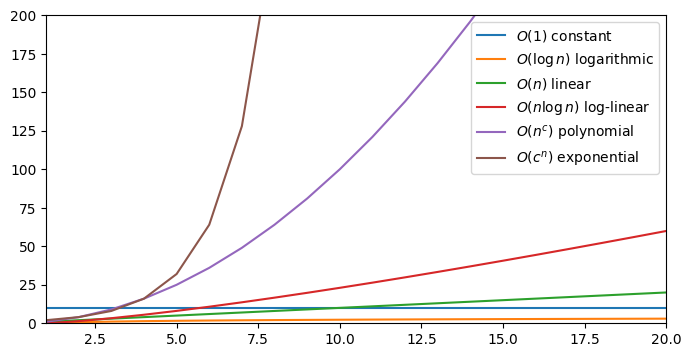

In [3]:
import matplotlib.pyplot as plt
import math

x = [i for i in range(1, 21)]

plt.figure(figsize=(8, 4))
plt.plot(x, [10 for i in x], label=r'$O(1)$ constant')
plt.plot(x, [math.log(i) for i in x], label=r'$O(\log n)$ logarithmic')
plt.plot(x, [i for i in x], label=r'$O(n)$ linear')
plt.plot(x, [i*math.log(i) for i in x], label=r'$O(n \log n)$ log-linear')
plt.plot(x, [i**2 for i in x], label=r'$O(n^c)$ polynomial')
plt.plot(x, [2**i for i in x], label=r'$O(c^n)$ exponential')
plt.legend(loc='upper right')
plt.ylim(0, 200)
plt.xlim(1, 20)
plt.show()


## Approximation

* Keep the term with the largest growth rate
* Drop any constants from the remaining term

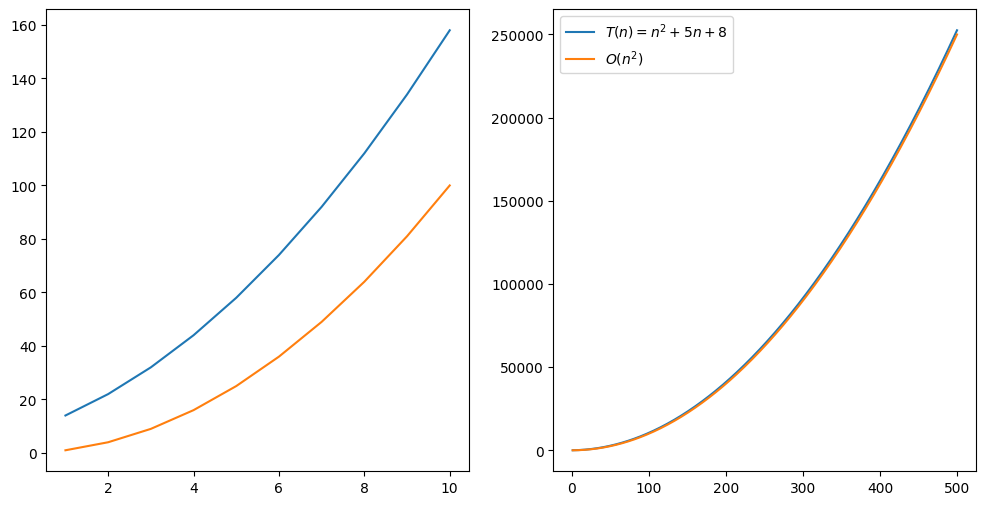

In [4]:
import matplotlib.pyplot as plt
import math

maxx = [11, 501]
fig = plt.figure(figsize=(12, 6))

for k in range(len(maxx)):
    plt.subplot(1, 2, k+1)
    x = [i for i in range(1, maxx[k])]
    plt.plot(x, [i*i + 5*i + 8 for i in x], label=r'$T(n) = n^2 + 5n + 8$')
    plt.plot(x, [i*i for i in x], label=r'$O(n^2)$')
plt.legend(loc='upper left')
plt.show()


## Constant Complexity: $O(1)$

* Running time is independent of the input size

In [8]:
def sum_of_n(n):
    """Assume n is a positive integer. 
    Calculate the sum of all integers from 1 to n, inclusive.
    """
    return int((n*(n+1))/2)

for i in [100000, 1000000, 10000000]:
    start = time.time()
    res = sum_of_n(i)
    end = time.time()
    print(res, end - start)

5000050000 3.0994415283203125e-06
500000500000 2.6226043701171875e-06
50000005000000 1.6689300537109375e-06


## Logarithmic Complexity: $O(\log n)$

* Running time grows as the log of at least one of the inputs
* Typically, we use base 2 but the base of the logarithm does not matter as $\log_2 x = log_2 10 * log_{10} x$ and we ignore constants
* If we use base 2, then we can say: **Every time the size of the input doubles, the algorithm performs one additional step.**

```r
### R code ###

# Program using bisection search to find an approximation 
# within epsilon to the square root of a number x.
bisec_search <- function(x, epsilon) {
  # Define interval for search
  low <- 0
  high <- max(1, x)

  # Start in the middle
  guess <- (low + high) / 2

  # Narrow down search interval until guess close enough
  while (abs(guess ** 2 - x) >= epsilon) {
    if (guess ** 2 < x) {
      low <- guess
    } else {
      high <- guess
    }
    guess <- (low + high) / 2
  }
  return(guess)
}

bisec_search(25, 0.01)
```

## Linear Complexity: $O(n)$

* Usually, algorithms dealing with lists and sequences as they touch each element of the sequence a constant number of times
    * E.g., comparing two strings

In [10]:
for x in range(10):
    print(x, end=' ')

0 1 2 3 4 5 6 7 8 9 

```r
### R code ###
        
# Program to find n!        
factorial <- function(n) {    
  if (n == 1) {
    return(n)
  } else {
    return(n * factorial(n-1))
  }
}

factorial(5)
```

## Log-Linear Complexity: $O(n \log n)$

* Many practical algorithms are log-linear
* For example, **sorting a list**
* Next week, we'll study different sorting algorithms

## Polynomial Complexity: $O(n^c)$

* E.g. quadratic $O(n^2)$ or cubic $O(n^3)$
* Usually, algorithms with nested loops

In [ ]:
n = 10
test = 0
for i in range(1, n + 1):
    for j in range(1, n + 1):
        test += i * j
print(test)

3025


## Exponential Complexity: $O(c^n)$

* Many important problems are inherently exponential
* Exponential algorithms are considered too slow to be practical
* In such cases, we can find algorithms that provide approximate solutions or at least address specific instances of the problem

```r
### R code ###

# Program to find the n-th Fibonacci number using recursion
recurse_fibonacci <- function(n) {
    if(n <= 1) {
        return(n)
    } else {
        return(recurse_fibonacci(n-1) + recurse_fibonacci(n-2))
    }
}

print(recurse_fibonacci(10))
```

## Important Computational Complexity Classes


![Big O](figs/big-o.jpg "Big O")

## Analyzing Time Complexity

Where to look:

* Function and method calls 
* Recursive calls
* Loops


## Time Complexity of Python List Methods

* Growing a list
    * `L.append(k)` is $O(1)$
    * `L + [k]` is $O(l)$ where $l$ is the size of list `L`

*The method `append()` adds an item in place and since it adds to the end of the list, it does not have to touch the existing items*. In contrast, the list concatenation operation touches every item of the first list since it creates a copy of it.

In [2]:
import time
def l_concatenate(k):
    lst = []
    for i in range(k):
        lst = lst + [i]
    return lst

def l_append(k):
    lst = []
    for i in range(k):
        lst.append(i)        
    return lst

def timit(fnc, func_arg): # Note that functions can be passed as arguments
    start = time.time()
    fnc(*func_arg)  # Pass items from iterable as function arguments
    end = time.time()
    print(fnc.__name__, '\t', end - start)
    
timit(l_concatenate, (10000,))
timit(l_append, (10000,))

l_concatenate 	 0.11373376846313477
l_append 	 0.00034999847412109375


## Time Complexity of Python List Methods

* Creating a list

In [3]:
def l_concatenate(k):
    lst = []
    for i in range(k):
        lst = lst + [i]
    return lst

def l_append(k):
    lst = []
    for i in range(k):
        lst.append(i)        
    return lst

def l_comprehen(k):
    return [i for i in range(k)]

def l_range(k):
    return list(range(k))

timit(l_concatenate, (10000,))
timit(l_append, (10000,))
timit(l_comprehen, (10000,))
timit(l_range, (10000,))

l_concatenate 	 0.10821795463562012
l_append 	 0.0003719329833984375
l_comprehen 	 0.00026702880859375
l_range 	 0.00013113021850585938


## Time Complexity of Python List Methods

$O(1)$

* Indexing `[]`, `append()`, `pop()`


$O(n)$

* Iteration, `pop(i)`, `insert()`, `del`, `remove()`, `in`, `reverse()`, `min()`, `max()`

$O(n \log n)$

* `sort()`




## Time Complexity of Python Dictionary Methods

$O(1)$

* Indexing `[]`, `in`, `del`

In [ ]:
def in_seq(i, seq):
    return i in seq

print('List:')
for n in [10000, 100000, 1000000]:
    last = n - 1
    lst = [i for i in range(n)]
    timit(in_seq, (last, lst))

print('Dictionary:')
for n in [10000, 100000, 1000000]:
    last = n - 1
    dic = {i: None for i in range(n)}
    timit(in_seq, (last, dic))


List:
in_seq 	 0.00011086463928222656
in_seq 	 0.001123189926147461
in_seq 	 0.012640953063964844
Dictionary:
in_seq 	 9.5367431640625e-07
in_seq 	 1.9073486328125e-06
in_seq 	 2.86102294921875e-06


$O(n)$

* Iteration


## Space Complexity 

Use Big-O notation for the amount of memory required by an algorithm.

Compare the total size of any new variables the algorthm is allocating, relative to the size of the input.

Where to look:

* New lists, dictionaries, etc.
* New stacks in recursive calls

## Space Complexity: Examples 1-2

* $O(1)$

In [4]:
def print_n_times(s, n):
    for i in range(n):
        print(s)        

In [5]:
print_n_times('Hello', 5)

Hello
Hello
Hello
Hello
Hello


* $O(n)$

In [ ]:
def combine_n_times(s, n):
    ls = [s for i in range(n)]
    return ls

*To be precise, the answer here is $O(sn)$ since the required memory depends on the size of both inputs.*

## Space Complexity: Example 3

In [6]:
def list_sum(lst):
    if len(lst) == 1:  
        return lst[0]
    else:
        return lst[0] + list_sum(lst[1:])     

list_sum(list(range(100)))

4950

Each recursive call is added to the call stack and takes up actual memory. Thus, the algorithm takes $O(n)$ space, where $n$ is the length of `lst`.

![Recursion](figs/recursion.png "Recursion")

## Space Complexity: Exercise 1

In [ ]:
# What is the space complexity of the function pair_list_sum()?

def pair_list_sum(lst):
    """Sum all elements of a list using pair_sum.
    Assume elements of the list are numeric type.
    """
    res = 0
    for i in range(len(lst) - 1):
        if i % 2 == 0:
            res += pair_sum(lst[i], lst[i+1])
        # if the one but last index is odd, just add the last number to the sum
        elif i == len(lst) - 2:
            res += lst[i+1]
    return res 
    
def pair_sum(a, b):
    """Take numbers a and b and return their sum a + b."""
    return a + b

pair_list_sum(list(range(100)))

4950

## Space Complexity: Exercise 2

In [ ]:
# What is the space complexity of the fib() function?

def fib(n):
    """Assume n is a non-negative integer.
    Find the n-th Fibonacci number using recursion.
    """
    if n <= 1:
        return n
    else:
        return fib(n - 1) + fib(n - 2)
    return answer

print(fib(10))

55


## Complexity Analysis in Practice

* There is no fixed list of possible runtimes, e.g. $O(\sqrt n)$, $O(n!)$, ...
* Runtimes can be a function of more than one input, e.g. $O(nk)$, $O(n + k)$

* Big-O describes the rate of increase in runtime, not the actual runtime
    * Benchmarking is still a useful tool

* Big-O ignores contsants but they often matter in practice
    * If you reduce your code from three loops to one loop, Big-O will not change but the difference may be on the order of hours or days! 

* There is often a tradeoff between time and space efficiency
* **You need a balance between runtime, space, implementation time, maintainability, and readability**

## Analyzing and Benchmarking Your Code: Exercise 1

In [8]:
# What is the time complexity and actual runtime 
# of the two get_centroid functions?

import csv

def get_data():
    """Read the file Wholesale customers data.csv 
    and return part of the data as a list of lists.
    """
    with open('Wholesale customers data.csv') as f:
        reader = csv.reader(f)
        data = [[int(i) for i in row[2:]] for row in reader if row[0] != 'Channel']
    return data

def get_centroid(pointLists):
    """Estimate the centroid for a collection of n-dimensional points.
    Assume pointLists is a collection of lists of numerical values.
    Return a list of numerical values (the coordinates of the centroid).
    """
    num = len(pointLists) # O(1)
    centroids = [] # O(1)
    demension = len(pointLists[0]) # O(1)
    
    for a in range(demension): # does 1,2,3,4..,d operations, thus O(d)
        centroids.append(0.0) # O(1)

    for i in range(num): # O(l) happens once for each row in the dataset
        point =  pointLists[i] # O(1)
        for d in range(demension): # O(d) 
            centroids[d] = centroids[d] + point[d] # O(1)
            
    for a in range(demension): # O(d)
        centroids[a] = centroids[a]/num # O(1)

    return centroids


[12000.297727272728, 5796.265909090909, 7951.277272727273, 3071.931818181818, 2881.4931818181817, 1524.8704545454545]
[12000.297727272728, 5796.265909090909, 7951.277272727273, 3071.931818181818, 2881.4931818181817, 1524.8704545454545]


In [11]:
# Calculating order

# O(1 + 1 + 1 + d*1 + l*(1 +d*1) + d*1)
# O(3 + d + l + ld + d)
# O(3 + 2d + l + ld)
# O(2d + l + ld) # first term and second term depend on how long list is, and dimensions in data, but last data depends on length*dimensions
# ld will increase more quickly than first two terms
# O(ld)
# polynomial order of growth 


In [ ]:
def get_centroid_2(points):
    """Estimate the centroid for a collection of n-dimensional points.
    Assume pointLists is a collection of lists of numerical values.
    Return a list of numerical values (the coordinates of the centroid).
    """
    centroid = []
    num_points = len(points)
    num_dims = len(points[0])
    for dim in range(num_dims):
        coord = [i[dim] for i in points] # same order of growth, but faster than running a regular for loop
        centroid.append(sum(coord)/num_points)
    return centroid

data = get_data()
print(get_centroid(data))
print(get_centroid_2(data))

In [ ]:
# O(ld)

Two functions have the same order of growth, but the second one is faster, because of the actual methods used in the function

In [9]:
from timeit import timeit

timeit('get_centroid(data)', number=100,
       setup='from __main__ import data, get_centroid')

0.025172374967951328

In [10]:
timeit('get_centroid_2(data)', number=100,
         setup='from __main__ import data, get_centroid_2')

0.015211042016744614

Why is one quicker than the other?

- input of pointsList, is of length L and dimensions d

## Analyzing and Benchmarking Your Code: Exercise 2

In [ ]:
# The algorithms take two inputs: list coauthors of length c 
# and dictionary author_dic of length d.
# What is the time complexity of the two algorithms?

# Algorithm 1
for k, v in author_dic.items():
    vlst = [sub_list[1] for sub_list in coauthors if sub_list[0] == k and sub_list[1] != k]
    vlst = sorted(vlst)
    author_dic[k] = vlst
    
# Algorithm 2
for i, j in coauthors:
    if j != i:
        author_dic[i].append(j)

## Algorithms and Order of Growth

* **Algorithmic complexity**, also called running time and order of growth, refers to the number of steps a program takes as a function of the size of its inputs  

* We use **Big-O** notation to express how, in the worst-case scenario, an algorithm's **running time or space requirements** grow as the input size grows

* **Complexity analysis and benchmarking** are essential for designing programs that can efficiently manage large amounts of data and large numbers of users 

-------

* **Lab**: Practicing order of growth analysis
* **Next week**: Basic searching and sorting algorithms

## Problem Set 5 will take place in class next week!
* Come to your class on Tuesday, November 28. Don't be late. 
* **7 questions, 25 min long**
  * Give **Big-O for time complexity** and explain reasoning in 1-2 sentences.
  * 2 questions also ask you to write a simple function (~3 lines of code each)
* If you miss class and have not informed us **in advance** with a valid reason, we will mark your submission as **no attempt** and assign 0 to it.
* If you have an adjustments plan and would like to use it, contact your class teacher **now**.